In [1]:
import os
import tweepy as tw
import pandas as pd
tw_key = 'ZMWO'
tw_secret = 'CrJ'
tw_access_token = '1499373'
tw_access_token_secret = '97mH7'
auth = tw.OAuthHandler(tw_key, tw_secret)
auth.set_access_token(tw_access_token, tw_access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = "Ministry of Truth"

In [2]:
tweets = tw.Cursor(api.search, q=search_words, lang="en").items(1000)
MOTTweets = [[tweet.id,tweet.user.screen_name, tweet.user.verified, tweet.text, tweet.place, tweet.user.location, tweet.source,tweet.created_at,tweet.retweet_count,tweet.favorite_count] 
             for tweet in tweets]
MOTTweetsdf = pd.DataFrame(data=MOTTweets, columns=['id','user',"verified","text","source","place","TweetSource","created_at","retweetCount","Likes"])

In [3]:
import numpy as np
from IPython.display import display
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
MOTTweetsdf['date'] = pd.DatetimeIndex(MOTTweetsdf['created_at']).date
MOTTweetsdf['hour'] = pd.DatetimeIndex(MOTTweetsdf['created_at']).hour
MOTTweetsdf['minutes'] = pd.DatetimeIndex(MOTTweetsdf['created_at']).minute
MOTTweetsdf['seconds'] = pd.DatetimeIndex(MOTTweetsdf['created_at']).second
MOTTweetsdf['tweettime'] = pd.DatetimeIndex(MOTTweetsdf['created_at']).time
MOTTweetsdf_filtered = MOTTweetsdf[['date', 'retweetCount','text','tweettime']]
MOTTweetsdf_filtered.head(5)

,date,retweetCount,text,tweettime
0,2022-05-24,49,RT @jennycohn1: “Just hours after Jankowicz tw...,01:22:39
1,2022-05-24,17,"RT @SlowNewsDayShow: Patriot Act co-author, fo...",01:21:42
2,2022-05-24,721,"RT @RepMTG: Don’t worry everyone, when public ...",01:21:39
3,2022-05-24,1207,RT @thebradfordfile: LOL. Biden replaced the m...,01:21:11
4,2022-05-24,0,@ChillGamerMac Judgement Day like said is the ...,01:20:48


In [4]:
retweet_max = np.max(MOTTweetsdf['retweetCount'])
favourite_max = np.max(MOTTweetsdf['Likes'])
favourite = MOTTweetsdf[MOTTweetsdf.Likes == favourite_max].index[0]
retweet = MOTTweetsdf[MOTTweetsdf.retweetCount == retweet_max].index[0]
print("Tweet with highest likes: \n{}".format(MOTTweetsdf['text'][favourite]))
print("No of likes: {}".format(favourite_max))
print("Tweet with highest retweets: \n{}".format(MOTTweetsdf['text'][retweet]))
print("No of retweets: {}".format(retweet_max))

Tweet with highest likes: 
Trump didn't cancel pipelines, didn't decrease oil leases, did not ask illegal aliens to come pouring in, isn't app… https://t.co/Ibxs1Hc1Sv
No of likes: 188
Tweet with highest retweets: 
RT @ErrolWebber: Adolf Hitler had a Ministry of Truth.

Joseph Goebbels had a Ministry of Truth.

Joseph Stalin had a Ministry of Truth.

J…
No of retweets: 38036


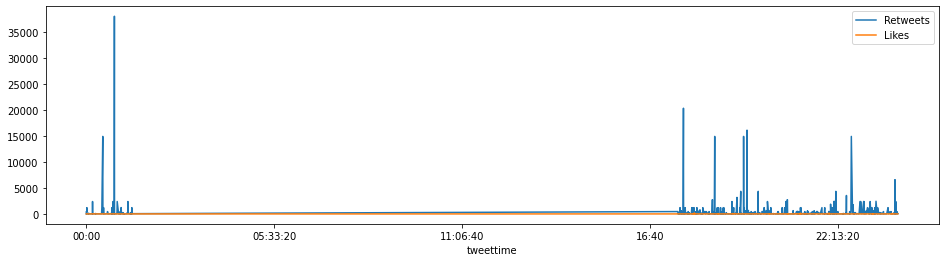

In [6]:
timeret = pd.Series(data=MOTTweetsdf['retweetCount'].values, index=MOTTweetsdf['tweettime'])
timefav = pd.Series(data=MOTTweetsdf['Likes'].values, index=MOTTweetsdf['tweettime'])
timeret.plot(figsize=(16,4), label="Retweets", legend=True)
timefav.plot(figsize=(16,4), label="Likes", legend=True)